<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [11]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv('housing-data.csv', header=None, names=names, delim_whitespace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,"sqft,bdrms,age,price",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2104,3,70,399900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1600,3,28,329900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2400,3,44,369000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1416,2,49,232000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"3000,4,75,539900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1985,4,61,299900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"1534,3,12,314900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"1427,3,57,198999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"1380,3,14,212000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,"sqft,bdrms,age,price",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2104,3,70,399900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1600,3,28,329900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2400,3,44,369000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1416,2,49,232000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Shape
data.shape

(48, 14)

##### 1. Plot Histogram of `RM`

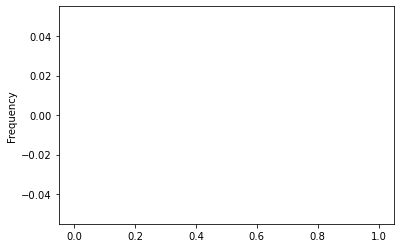

In [29]:
#  ANSWER
MEDV = data['RM']
MEDV.plot(kind='hist');

##### 2. Plot Histogram of `MEDV`

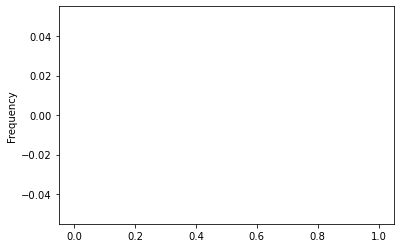

In [30]:
# ANSWER
plt=data['MEDV']
plt.plot(kind='hist')

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

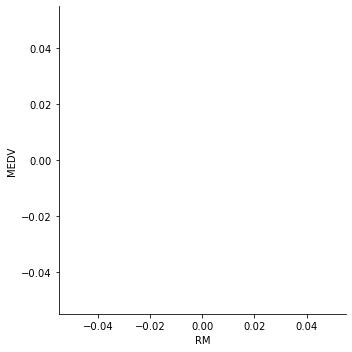

In [32]:
# ANSWER

sns.lmplot(x="RM", y="MEDV", data=data);

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [0]:
# ANSWER
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [33]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N)


ValueError: a must be greater than 0 unless no samples are taken

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

In [0]:
# ANSWER

ax = sns.distplot(medv_over_6, label='Large House', kde=False);
sns.distplot(medv_under_6, ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

##### 7. Calculate Variance

Calculate variance for both samples.

In [0]:
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [0]:
# ANSWER
std = np.sqrt((var_medv_over_6 + var_medv_under_6) / 2)
print('std dev:', std)

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [0]:
# ANSWER
t = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [0]:
# ANSWER
df = 2 * N - 2
df

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [0]:
# ANSWER
stats.t.cdf

p_value = 1 - cdf(t)
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [0]:
# ANSWER
 #Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [0]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [0]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [ ]:
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [34]:
# ANSWER
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

NameError: name 'ttest_ind' is not defined

#### Use `Stats` Package

In [ ]:
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [0]:
# ANSWER



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



